In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [ ]:
#Import Important modules/libraries to be used:  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics as st
import seaborn as sns 
from mpl_toolkits import mplot3d
import statsmodels.api as sm
import pylab as py
from tabulate import tabulate
from scipy import stats
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.regression import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix
# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

In [ ]:
df=pd.read_excel("DIM_TEAM.xlsx")
df

,Team_SK,Team_Id,Team_Name
0,0,1,Kolkata Knight Riders
1,1,2,Royal Challengers Bangalore
2,2,3,Chennai Super Kings
3,3,4,Kings XI Punjab
4,4,5,Rajasthan Royals
5,5,6,Delhi Daredevils
6,6,7,Mumbai Indians
7,7,8,Deccan Chargers
8,8,9,Kochi Tuskers Kerala
9,9,10,Pune Warriors


In [ ]:
df1=pd.read_excel("DIM_MATCH.xlsx")
arr_lst=[]
for i in range(len(df1)):
  if df1["Team1"][i]==df1["match_winner"][i]:
     arr_lst.append(1)
  else:
     arr_lst.append(0)
df1["Result"]=pd.DataFrame(arr_lst)
df1

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id,Result
0,546,980964,Royal Challengers Bangalore,Kolkata Knight Riders,2016-05-02,2016,M Chinnaswamy Stadium,Bangalore,India,Kolkata Knight Riders,Kolkata Knight Riders,field,wickets,Result,AD Russell,5.0,1,0
1,547,980966,Gujarat Lions,Delhi Daredevils,2016-05-03,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Delhi Daredevils,Delhi Daredevils,field,wickets,Result,RR Pant,8.0,1,0
2,548,980968,Kolkata Knight Riders,Kings XI Punjab,2016-05-04,2016,Eden Gardens,Kolkata,India,Kings XI Punjab,Kolkata Knight Riders,field,runs,Result,AD Russell,7.0,1,1
3,549,980970,Delhi Daredevils,Rising Pune Supergiants,2016-05-05,2016,Feroz Shah Kotla,Delhi,India,Rising Pune Supergiants,Rising Pune Supergiants,field,wickets,Result,AM Rahane,7.0,1,0
4,550,980972,Sunrisers Hyderabad,Gujarat Lions,2016-05-06,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Sunrisers Hyderabad,Sunrisers Hyderabad,field,wickets,Result,B Kumar,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,541,980954,Rising Pune Supergiants,Gujarat Lions,2016-04-29,2016,Maharashtra Cricket Association Stadium,Pune,India,Gujarat Lions,Gujarat Lions,field,wickets,Result,DR Smith,3.0,1,0
633,542,980956,Delhi Daredevils,Kolkata Knight Riders,2016-04-30,2016,Feroz Shah Kotla,Delhi,India,Kolkata Knight Riders,Delhi Daredevils,field,runs,Result,CR Brathwaite,27.0,1,1
634,543,980958,Sunrisers Hyderabad,Royal Challengers Bangalore,2016-04-30,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Royal Challengers Bangalore,Sunrisers Hyderabad,field,runs,Result,DA Warner,15.0,1,1
635,544,980960,Gujarat Lions,Kings XI Punjab,2016-05-01,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Gujarat Lions,Kings XI Punjab,field,runs,Result,AR Patel,23.0,1,0


In [ ]:
toss_dec=[]
for i in range(len(df1)):
  if   (df1["Toss_Name"][i])=="bat" or (df1["Toss_Name"][i])=="Bat":
      toss_dec.append(1)
  else:
      toss_dec.append(0)
df1["Toss_Dec"]=pd.DataFrame(toss_dec)

In [ ]:
set(df1['Toss_Dec'])

{0, 1}

In [ ]:
win_type=[]
for i in range(len(df1)):
  if type(df1["Win_Type"][i])==str and (df1["Win_Type"][i])[0:3]=="run":
      win_type.append(0)
  elif type(df1["Win_Type"][i])==str and (df1["Win_Type"][i])=="wickets":
      win_type.append(1)
  else:
      win_type.append(2)
df1["WinType"]=pd.DataFrame(win_type)

In [ ]:
tn=['Chennai Super Kings',
  'Deccan Chargers',
  'Delhi Daredevils',
  'Gujarat Lions',
  'Kings XI Punjab',
  'Kochi Tuskers Kerala',
  'Kolkata Knight Riders',
  'Mumbai Indians',
  'Pune Warriors',
  'Rajasthan Royals',
  'Rising Pune Supergiants',
  'Royal Challengers Bangalore',
  'Sunrisers Hyderabad']
team1=[]
team2=[]
toss_winner=[]
for i in range(len(df1)):
       team1.append(tn.index(df1["Team1"][i]))
       team2.append(tn.index(df1["Team2"][i]))
       if df1["Toss_Winner"][i] in tn:
          toss_winner.append(tn.index(df1["Toss_Winner"][i]))
       else:
          toss_winner.append(-1)
df1["team1"]=pd.DataFrame(team1)
df1["team2"]=pd.DataFrame(team2)
df1["toss_winner"]=pd.DataFrame(toss_winner)
df1

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,...,Outcome_Type,ManOfMach,Win_Margin,Country_id,Result,Toss_Dec,WinType,team1,team2,toss_winner
0,546,980964,Royal Challengers Bangalore,Kolkata Knight Riders,2016-05-02,2016,M Chinnaswamy Stadium,Bangalore,India,Kolkata Knight Riders,...,Result,AD Russell,5.0,1,0,0,1,11,6,6
1,547,980966,Gujarat Lions,Delhi Daredevils,2016-05-03,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Delhi Daredevils,...,Result,RR Pant,8.0,1,0,0,1,3,2,2
2,548,980968,Kolkata Knight Riders,Kings XI Punjab,2016-05-04,2016,Eden Gardens,Kolkata,India,Kings XI Punjab,...,Result,AD Russell,7.0,1,1,0,0,6,4,4
3,549,980970,Delhi Daredevils,Rising Pune Supergiants,2016-05-05,2016,Feroz Shah Kotla,Delhi,India,Rising Pune Supergiants,...,Result,AM Rahane,7.0,1,0,0,1,2,10,10
4,550,980972,Sunrisers Hyderabad,Gujarat Lions,2016-05-06,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Sunrisers Hyderabad,...,Result,B Kumar,5.0,1,1,0,1,12,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,541,980954,Rising Pune Supergiants,Gujarat Lions,2016-04-29,2016,Maharashtra Cricket Association Stadium,Pune,India,Gujarat Lions,...,Result,DR Smith,3.0,1,0,0,1,10,3,3
633,542,980956,Delhi Daredevils,Kolkata Knight Riders,2016-04-30,2016,Feroz Shah Kotla,Delhi,India,Kolkata Knight Riders,...,Result,CR Brathwaite,27.0,1,1,0,0,2,6,6
634,543,980958,Sunrisers Hyderabad,Royal Challengers Bangalore,2016-04-30,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Royal Challengers Bangalore,...,Result,DA Warner,15.0,1,1,0,0,12,11,11
635,544,980960,Gujarat Lions,Kings XI Punjab,2016-05-01,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Gujarat Lions,...,Result,AR Patel,23.0,1,0,0,0,3,4,3


In [ ]:
set(df1['team1'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [ ]:
# create a sample dataframe with a categorical variable
new_df = df1['team1']#pd.DataFrame({'status': ['Single', 'Married', 'Divorced', 'Married', 'Single']})

# create dummy variables for the 'status' column
dummy_vars = pd.get_dummies(new_df, drop_first=True)

# concatenate the original dataframe with the dummy variables
df = pd.concat([new_df, dummy_vars], axis=1)

# drop the original 'status' column
df.drop('team1', axis=1, inplace=True)

print(df)


     1  2  3  4  5  6  7  8  9  10  11  12
0    0  0  0  0  0  0  0  0  0   0   1   0
1    0  0  1  0  0  0  0  0  0   0   0   0
2    0  0  0  0  0  1  0  0  0   0   0   0
3    0  1  0  0  0  0  0  0  0   0   0   0
4    0  0  0  0  0  0  0  0  0   0   0   1
..  .. .. .. .. .. .. .. .. ..  ..  ..  ..
632  0  0  0  0  0  0  0  0  0   1   0   0
633  0  1  0  0  0  0  0  0  0   0   0   0
634  0  0  0  0  0  0  0  0  0   0   0   1
635  0  0  1  0  0  0  0  0  0   0   0   0
636  0  0  0  0  0  0  0  0  0   1   0   0

[637 rows x 12 columns]


In [ ]:
np.corrcoef(df1['toss_winner'],df1['team1'])

array([[1.        , 0.40683535],
       [0.40683535, 1.        ]])

In [ ]:
various_model_accuracies=[]
various_model_precision=[]
various_model_recall=[]

In [ ]:

data_consd=df1[["team1","team2","toss_winner","Toss_Dec","WinType"]]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_consd, df1["Result"], test_size=0.3,random_state=42)
# Create a KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
various_model_accuracies.append(accuracy*100)
various_model_precision.append(precision_score(y_test,y_pred)*100)
various_model_recall.append(recall_score(y_test,y_pred)*100)
confusion_matrix(y_test,y_pred)

Accuracy:  0.5520833333333334


array([[53, 50],
       [36, 53]])

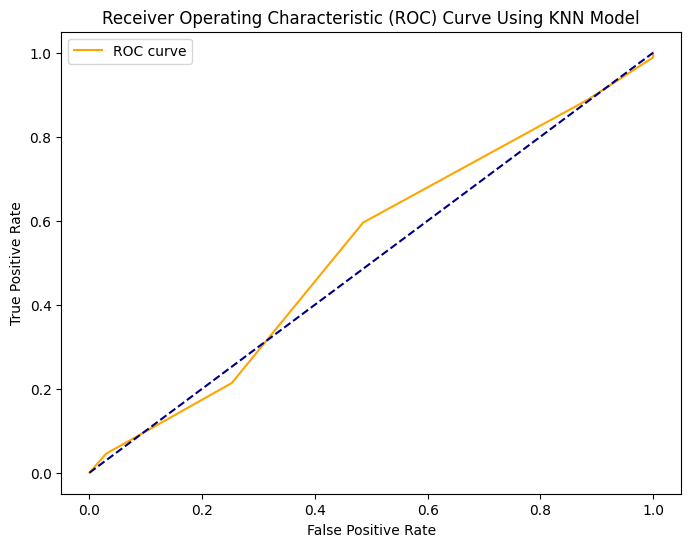

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve#, plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Compute the TPR and FPR values
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using KNN Model')
plt.legend()
plt.show()

# Alternatively, you can use the `plot_roc_curve()` function to plot the ROC curve
#plot_roc_curve(model, X_test, y_test)
#plt.show()

In [ ]:
data_consd=df1[["team1","Toss_Dec"]]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_consd, df1["Result"], test_size=0.3, random_state=42)

# Train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
various_model_accuracies.append(accuracy*100)
various_model_precision.append(precision_score(y_test,y_pred)*100)
various_model_recall.append(recall_score(y_test,y_pred)*100)
confusion_matrix(y_test,y_pred)

Accuracy: 0.4635416666666667


array([[  2, 101],
       [  2,  87]])

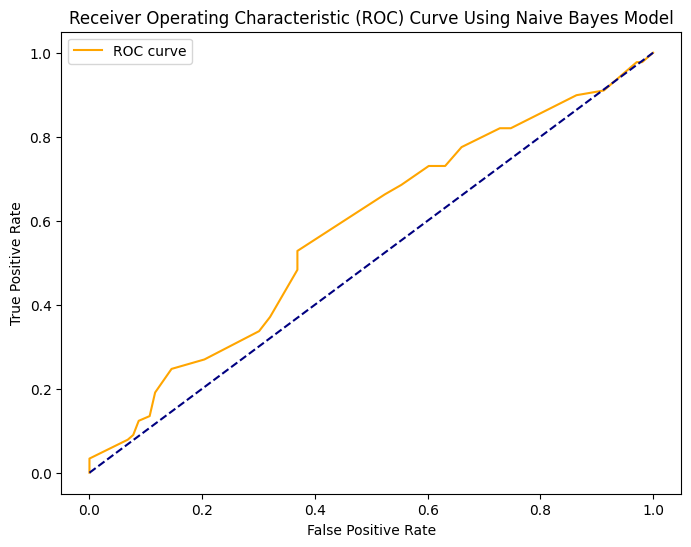

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve#, plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Compute the TPR and FPR values
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using Naive Bayes Model')
plt.legend()
plt.show()

# Alternatively, you can use the `plot_roc_curve()` function to plot the ROC curve
#plot_roc_curve(model, X_test, y_test)
#plt.show()

In [ ]:
#data_consd=df1[["team1","Toss_Dec"]]
data_consd=df1[["team1","team2","toss_winner","Toss_Dec","WinType"]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_consd, df1["Result"], test_size=0.3, random_state=42)

# Generate a random dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
various_model_accuracies.append(accuracy*100)
various_model_precision.append(precision_score(y_test,y_pred)*100)
various_model_recall.append(recall_score(y_test,y_pred)*100)
confusion_matrix(y_test,y_pred)

Accuracy: 0.8072916666666666


array([[76, 27],
       [10, 79]])

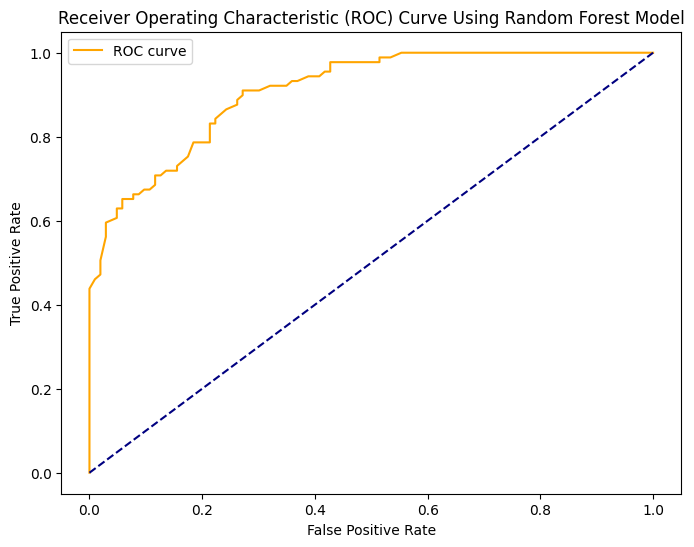

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve#, plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Compute the TPR and FPR values
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using Random Forest Model')
plt.legend()
plt.show()

# Alternatively, you can use the `plot_roc_curve()` function to plot the ROC curve
#plot_roc_curve(model, X_test, y_test)
#plt.show()

In [ ]:
#ata_consd=df1[["team1","team2","toss_winner","Toss_Dec","WinType"]]
data_consd=df1[["team1","team2","WinType"]]
# Split data
X_train, X_test, y_train, y_test = train_test_split(data_consd, df1["Result"], test_size=0.3, random_state=42)

# Instantiate model
clf = DecisionTreeClassifier(max_depth=3)

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
score = clf.score(X_test, y_test)
print(f"Accuracy: {score}")
various_model_accuracies.append(score*100)
various_model_precision.append(precision_score(y_test,y_pred)*100)
various_model_recall.append(recall_score(y_test,y_pred)*100)
confusion_matrix(y_test,y_pred)

Accuracy: 0.5052083333333334


array([[24, 79],
       [16, 73]])

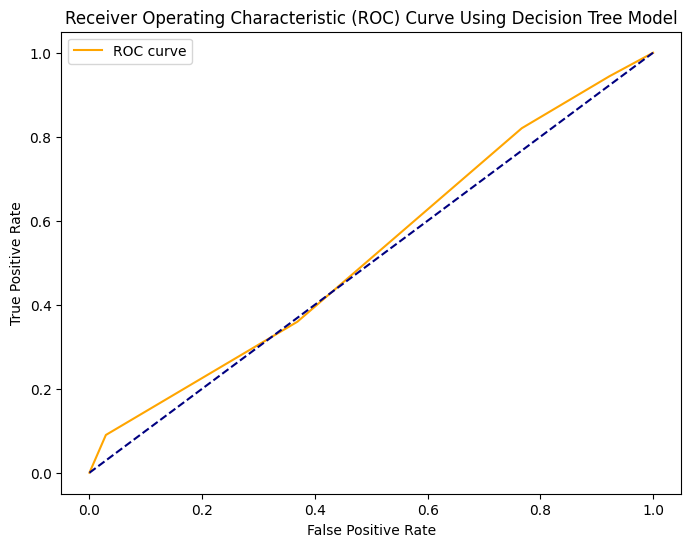

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve#, plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Compute the TPR and FPR values
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using Decision Tree Model')
plt.legend()
plt.show()

# Alternatively, you can use the `plot_roc_curve()` function to plot the ROC curve
#plot_roc_curve(model, X_test, y_test)
#plt.show()

In [ ]:
corr_prec=various_model_precision
corr_reca=various_model_recall
metric_df = pd.DataFrame({'Model_Name': ['KNN', 'KNN', 'Naive Bayes', 'Naive Bayes', 'Random Forest', 'Random Forest', 'Decision Tree', 'Decision Tree'], '': ["Precision", "Recall", "Precision", "Recall", "Precision", "Recall", "Precision", "Recall"], 'Vals': [corr_prec[0], corr_reca[0], corr_prec[1], corr_reca[1], corr_prec[2], corr_reca[2], corr_prec[3], corr_reca[3]]})
metric_df

,Model_Name,,Vals
0,KNN,Precision,51.456311
1,KNN,Recall,59.550562
2,Naive Bayes,Precision,46.276596
3,Naive Bayes,Recall,97.752809
4,Random Forest,Precision,74.528302
5,Random Forest,Recall,88.764045
6,Decision Tree,Precision,48.026316
7,Decision Tree,Recall,82.022472


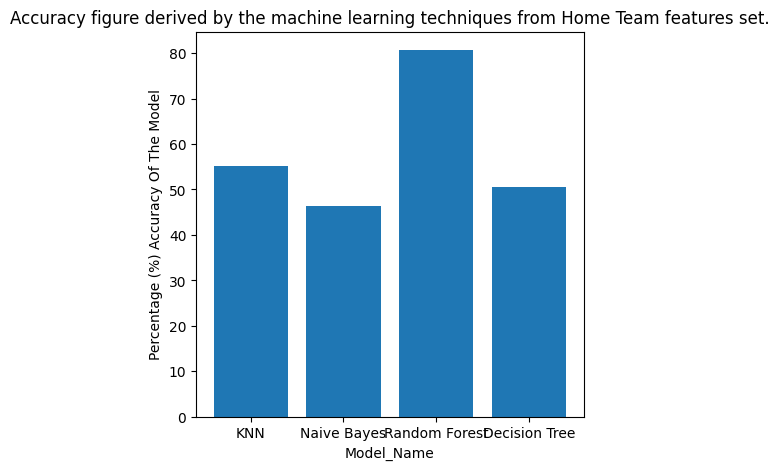

In [ ]:
model_name=['KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree']
corr_acc=various_model_accuracies
plt.rcParams["figure.figsize"] = (5,5)
plt.bar(model_name,corr_acc);
plt.xlabel("Model_Name")
plt.ylabel("Percentage (%) Accuracy Of The Model")
plt.title("Accuracy figure derived by the machine learning techniques from Home Team features set.");

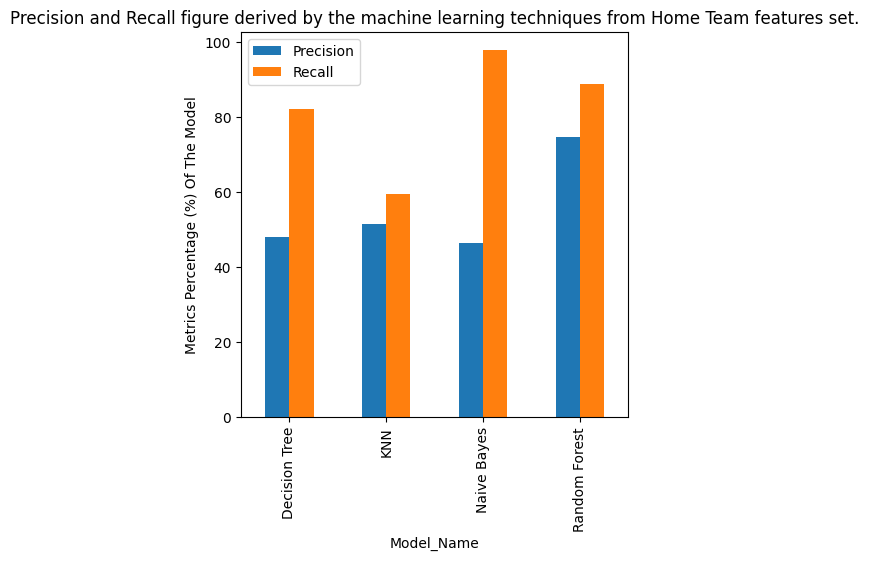

In [ ]:
metric_df.set_index(['Model_Name',''])['Vals'].unstack().plot.bar();
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel("Model_Name")
plt.ylabel("Metrics Percentage (%) Of The Model")
plt.title("Precision and Recall figure derived by the machine learning techniques from Home Team features set.");

In [ ]:
various_model_accuracies=[]
various_model_precision=[]
various_model_recall=[]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#ata_consd=df1[["team1","team2","toss_winner","Toss_Dec","WinType"]]
data_consd=df1[["team1","team2","WinType"]]
# Split data
X_train, X_test, y_train, y_test = train_test_split(data_consd, df1["Result"], test_size=0.3, random_state=42)

#X, y = make_classification(n_samples=100, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 #                                                   random_state=1)
clf = MLPClassifier(hidden_layer_sizes=200,random_state=1, max_iter=5000).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

#clf.predict(X_test[:,1])

#clf.score(X_test, y_test)
score = clf.score(X_test, y_test)
print(f"Accuracy: {score}")
various_model_accuracies.append(score*100)
various_model_precision.append(precision_score(y_test,y_pred)*100)
various_model_recall.append(recall_score(y_test,y_pred)*100)
confusion_matrix(y_test,y_pred)

Accuracy: 0.5


array([[24, 79],
       [16, 73]])

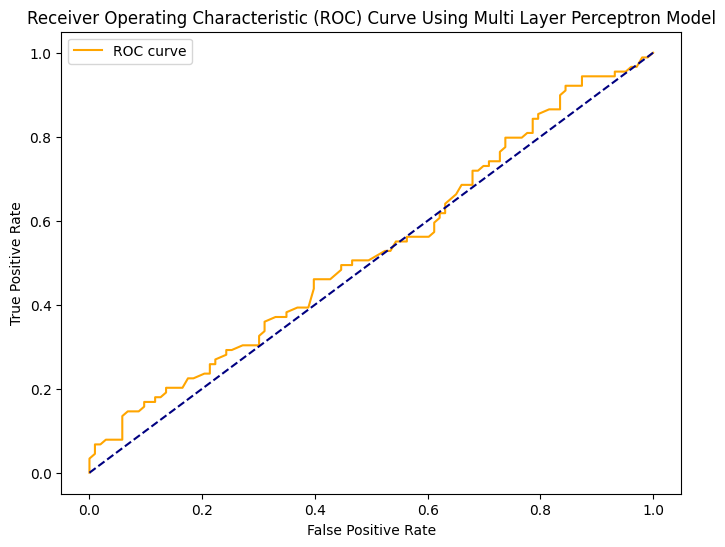

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve#, plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Compute the TPR and FPR values
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using Multi Layer Perceptron Model')
plt.legend()
plt.show()

# Alternatively, you can use the `plot_roc_curve()` function to plot the ROC curve
#plot_roc_curve(model, X_test, y_test)
#plt.show()

In [ ]:
#data_consd=df1[["team1","Toss_Dec"]]
data_consd=df1[["team1","team2","toss_winner","Toss_Dec","WinType"]]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_consd, df1["Result"], test_size=0.5, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm = SVC(kernel='rbf',probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#score = clf.score(X_test, y_test)
#print(f"Accuracy: {score}")
various_model_accuracies.append(accuracy*100)
various_model_precision.append(precision_score(y_test,y_pred)*100)
various_model_recall.append(recall_score(y_test,y_pred)*100)
confusion_matrix(y_test,y_pred)

Accuracy: 0.4827586206896552


array([[ 15, 142],
       [ 23, 139]])

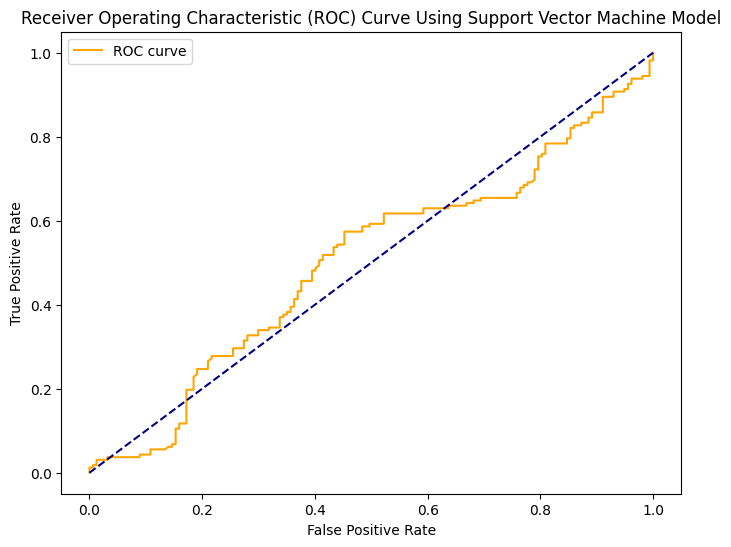

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve#, plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Compute the TPR and FPR values
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using Support Vector Machine Model')
plt.legend()
plt.show()

# Alternatively, you can use the `plot_roc_curve()` function to plot the ROC curve
#plot_roc_curve(model, X_test, y_test)
#plt.show()

In [ ]:
corr_prec=various_model_precision
corr_reca=various_model_recall
metric_df = pd.DataFrame({'Model_Name': ['MLP','MLP','SVM','SVM'], '': ["Precision", "Recall", "Precision", "Recall"], 'Vals': [corr_prec[0], corr_reca[0], corr_prec[1], corr_reca[1]]})
metric_df

,Model_Name,,Vals
0,MLP,Precision,48.026316
1,MLP,Recall,82.022472
2,SVM,Precision,49.466192
3,SVM,Recall,85.802469


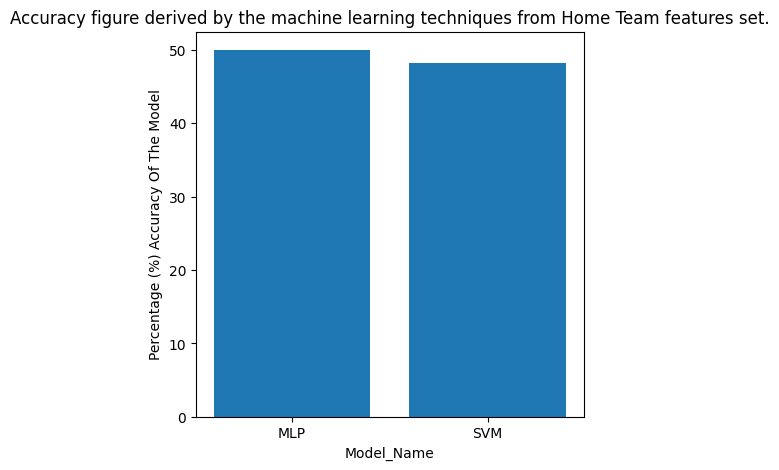

In [ ]:
model_name=['MLP', 'SVM']
corr_acc=various_model_accuracies
plt.rcParams["figure.figsize"] = (5,5)
plt.bar(model_name,corr_acc);
plt.xlabel("Model_Name")
plt.ylabel("Percentage (%) Accuracy Of The Model")
plt.title("Accuracy figure derived by the machine learning techniques from Home Team features set.");

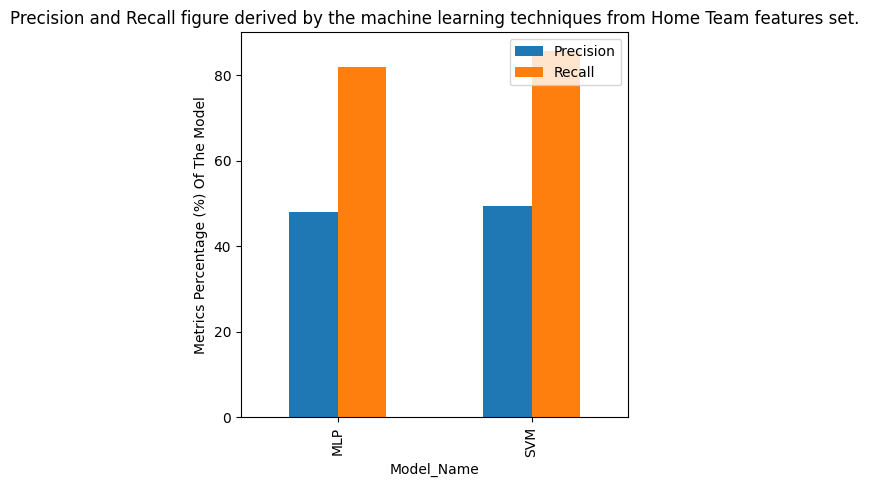

In [ ]:
metric_df.set_index(['Model_Name',''])['Vals'].unstack().plot.bar();
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel("Model_Name")
plt.ylabel("Metrics Percentage (%) Of The Model")
plt.title("Precision and Recall figure derived by the machine learning techniques from Home Team features set.");

In [ ]:
set(df1["Outcome_Type"])

{'No Result', 'Result', 'Superover', 'abandoned', 'tied'}

In [ ]:
#from statsmodels.LikelihoodModelResults import GLMResults
# Load the data into a pandas DataFrame
#data = pd.read_csv('data.csv')
data_consd=df1[["Toss_Dec"]]
# Define the dependent and independent variables
y = df1["Result"]
X = data_consd

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the model
print("Model Summary")
print(result.summary())
print("")
# Print the coefficients of the model
print("Coefficients Of The Model")
print(result.params)
print("")
# Calculate the deviance of the model
print("Deviance Of The Model")
print(result.resid_dev)
print("")
# Calculate the p-values of the coefficients
print("P-Values Of The Coefficients")
print(result.pvalues)
print("")

Optimization terminated successfully.
         Current function value: 0.686206
         Iterations 4
Model Summary
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  637
Model:                          Logit   Df Residuals:                      636
Method:                           MLE   Df Model:                            0
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                0.006746
Time:                        05:58:52   Log-Likelihood:                -437.11
converged:                       True   LL-Null:                       -440.08
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Toss_Dec       0.3629      0.123      2.949      0.003       0.122       0.604

Coefficients O

In [ ]:
colsdf=df1.columns
colsdf

Index(['Match_SK', 'match_id', 'Team1', 'Team2', 'match_date', 'Season_Year',
       'Venue_Name', 'City_Name', 'Country_Name', 'Toss_Winner',
       'match_winner', 'Toss_Name', 'Win_Type', 'Outcome_Type', 'ManOfMach',
       'Win_Margin', 'Country_id', 'Result', 'Toss_Dec', 'WinType', 'team1',
       'team2', 'toss_winner'],
      dtype='object')

In [ ]:
set(df1["Toss_Name"])

{'Bat', 'Field', 'bat', 'field', nan}

In [ ]:
model =smf.ols(formula="Result "+"~"+"toss_dec", data= df1 )
results = model.fit()
print(results.summary())

# Get different Variables for diagnostic
residuals = results.resid
fitted_value = results.fittedvalues
stand_resids = results.resid_pearson
influence = results.get_influence()
leverage = influence.hat_matrix_diag

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.057
Date:                Wed, 19 Apr 2023   Prob (F-statistic):             0.0141
Time:                        05:58:59   Log-Likelihood:                -457.85
No. Observations:                 637   AIC:                             919.7
Df Residuals:                     635   BIC:                             928.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4918      0.026     18.867      0.0

In [ ]:
df2=pd.read_excel("DIM_PLAYER_MATCH.xlsx")
df2

,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,...,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
0,-1,-1,-1,-1,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12694,33598700006,335987,6,R Dravid,1973-01-11,Right-hand bat,Right-arm offbreak,India,Captain,...,2008.0,0.0,35.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
2,12695,33598700007,335987,7,W Jaffer,1978-02-16,Right-hand bat,Right-arm offbreak,India,Player,...,2008.0,0.0,30.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
3,12696,33598700008,335987,8,V Kohli,1988-11-05,Right-hand bat,Right-arm medium,India,Player,...,2008.0,0.0,20.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
4,12697,33598700009,335987,9,JH Kallis,1975-10-16,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,2008.0,0.0,33.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,26681,108265000413,1082650,413,KH Pandya,1991-03-24,Left-hand bat,Slow left-arm orthodox,India,Player,...,2017.0,1.0,26.0,1.0,NaN,NaN,RG Sharma,SPD Smith,PA Patel,MS Dhoni
13989,26682,108265000430,1082650,430,A Zampa,1992-03-31,Right-hand bat,Legbreak googly,Australia,Player,...,2017.0,0.0,25.0,0.0,NaN,NaN,SPD Smith,RG Sharma,MS Dhoni,PA Patel
13990,26683,108265000483,1082650,483,LH Ferguson,1991-06-13,Right-hand bat,Right-arm fast,New Zealand,Player,...,2017.0,0.0,26.0,0.0,NaN,NaN,SPD Smith,RG Sharma,MS Dhoni,PA Patel
13991,26684,108265000488,1082650,488,RA Tripathi,1991-03-02,Right-hand bat,Right-arm medium,India,Player,...,2017.0,0.0,26.0,0.0,NaN,NaN,SPD Smith,RG Sharma,MS Dhoni,PA Patel


In [ ]:
df3=pd.read_excel("FACT_BALL_BY_BALL.xlsx")
df3

,Ball_key,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,StrikerKey,NonStrikerKey,...,NONStriker_SK,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk
0,3359870010101,335987,1,1,1,1,2,1.0,33598700001,33598700002,...,1,-1,-1,12702,13,-1,0,1,0,NaN
1,3359870010102,335987,1,2,1,1,2,2.0,33598700002,33598700001,...,0,-1,-1,12702,13,-1,0,1,0,NaN
2,3359870010103,335987,1,3,1,1,2,2.0,33598700002,33598700001,...,0,-1,-1,12702,13,-1,0,1,0,NaN
3,3359870010104,335987,1,4,1,1,2,2.0,33598700002,33598700001,...,0,-1,-1,12702,13,-1,0,1,0,NaN
4,3359870010105,335987,1,5,1,1,2,2.0,33598700002,33598700001,...,0,-1,-1,12702,13,-1,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150446,10826290190102,1082629,19,2,1,Gujarat Lions,Rising Pune Supergiants,NaN,108262900477,108262900088,...,87,-1,-1,26220,475,-1,12,11,0,-1.0
150447,10826290190103,1082629,19,3,1,Gujarat Lions,Rising Pune Supergiants,NaN,108262900477,108262900088,...,87,-1,-1,26220,475,-1,12,11,0,-1.0
150448,10826290190104,1082629,19,4,1,Gujarat Lions,Rising Pune Supergiants,NaN,108262900088,108262900477,...,476,-1,-1,26220,475,-1,12,11,0,-1.0
150449,10826290190105,1082629,19,5,1,Gujarat Lions,Rising Pune Supergiants,NaN,108262900088,108262900477,...,476,-1,-1,26220,475,-1,12,11,0,-1.0
